![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#Introdução a Data Science usando Estruturas de Dados 

***

**Nome:** Martha R. Piovesan &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **TIA:** 32086091

**Nome:** Larissa Said Rocha &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **TIA:** 32084341 

**Nome:** Gabriel Elchemer Paura &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; **TIA:** 32090765

***

# **Importando as bibliotecas**
***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***
# **Importando o CSV do Github**

### **Resumo dos dados do CSV**
***

In [ ]:
TempByState = pd.read_csv('https://raw.githubusercontent.com/larisr/Valeria-Projeto/add-file/GlobalLandTemperaturesByState.csv')
TempByState.info()
TempByState.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [ ]:
TempByState

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


***
# **Tratamento dos dados com a remoção de duplicados e vazios**
***

In [ ]:
# Tratamento dos dados com a remoção de duplicados e vazios

state = TempByState.dropna()
state = state.drop_duplicates()
state

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,China
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China


***
# **Código da Árvore Binária de Busca**
***

In [ ]:
# Código BST

class No:
	def __init__(self, dia=None, mediaTemp=None, mediaTemp2=None, estado=None, pais=None):
		self.dia=dia
		self.mediaTemp=mediaTemp
		self.mediaTemp2=mediaTemp2
		self.estado=estado
		self.pais=pais
		self.filho_esq=None
		self.filho_dir=None
		self.pai=None

class BST:
	def __init__(self):
		self.raiz=None

	def inserir(self, dia, mediaTemp, mediaTemp2, estado, pais):
		if self.raiz==None:
			self.raiz=No(dia, mediaTemp, mediaTemp2, estado, pais)
		else:
			self._inserir(dia, mediaTemp, mediaTemp2, estado, pais, self.raiz)

	def _inserir(self,dia, mediaTemp, mediaTemp2, estado, pais, cur_No):
		if mediaTemp<cur_No.mediaTemp:
			if cur_No.filho_esq==None:
				cur_No.filho_esq=No(dia, mediaTemp, mediaTemp2, estado, pais)
				cur_No.filho_esq.pai=cur_No
			else:
				self._inserir(dia, mediaTemp, mediaTemp2, estado, pais, cur_No.filho_esq)
		elif mediaTemp>cur_No.mediaTemp:
			if cur_No.filho_dir==None:
				cur_No.filho_dir=No(dia, mediaTemp, mediaTemp2, estado, pais)
				cur_No.filho_dir.pai=cur_No
			else:
				self._inserir(dia, mediaTemp, mediaTemp2, estado, pais, cur_No.filho_dir)
		else:
			pass

	def imprime(self):
		if self.raiz!=None:
			self._imprime(self.raiz)

	def _imprime(self,cur_No):
		if cur_No!=None:
			self._imprime(cur_No.filho_esq)
			print (cur_No.dia, cur_No.mediaTemp, cur_No.mediaTemp2, cur_No.estado, cur_No.pais)
			self._imprime(cur_No.filho_dir)
	
	def get_min_val(self):
		if self.raiz:
			return self.get_min(self.raiz)
	 
	def get_min(self, cur_No):
		if cur_No.filho_esq:
			return self.get_min(cur_No.filho_esq)
		return cur_No.mediaTemp
	
	def get_max_val(self):
		if self.raiz:
			return self.get_max(self.raiz)
	
	def get_max(self, cur_No):
		if cur_No.filho_dir:
			return self.get_max(cur_No.filho_dir)
		return cur_No.mediaTemp

***
### **Adicionando os dados na Árvore Binária Busca**
***

In [ ]:
bst= BST()

df = pd.DataFrame(state)
for index, row in df.iterrows():
	dia = row['dt']
	mediaTemp = row['AverageTemperature']
	mediaTemp2 = row['AverageTemperatureUncertainty']
	estado = row['State']
	pais = row['Country']
	bst.inserir(dia, mediaTemp, mediaTemp2, estado, pais)

#bst.print_tree()

***
### **Obtendo as temperaturas mínima e máxima da nossa BST**
***

In [ ]:
print("Max temp: ", bst.get_max_val())
print("Min temp: ", bst.get_min_val())
max = bst.get_max_val()
min = bst.get_min_val()

Max temp:  36.33900000000001
Min temp:  -45.389


***
### **Informações obtidas por meio da temperatura máxima e mínima**
***

In [ ]:
max_merge = df.loc[df['AverageTemperature'] == 36.33900000000001]
min_merge = df.loc[df['AverageTemperature'] == -45.389]
pd.merge(min_merge, max_merge, how='outer')

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1915-01-01,-45.389,1.839,Sakha,Russia
1,2012-06-01,36.339,0.385,Delhi,India


***
# **Algumas informações importantes sobre a temperatura média**
***

In [ ]:
state.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


***
# **Boxplot das temperaturas médias**
***

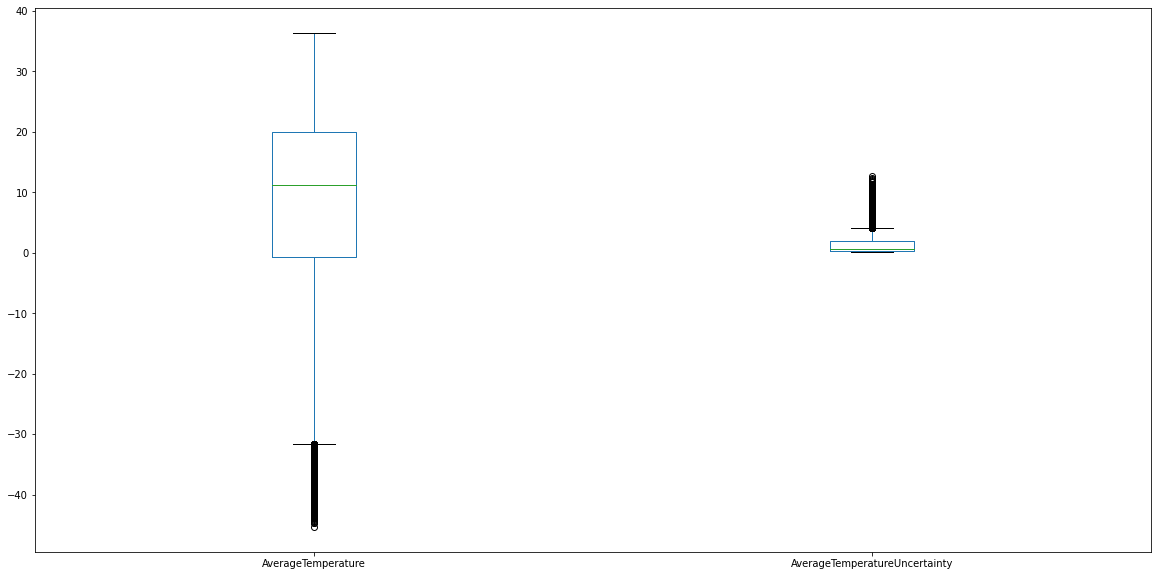

In [ ]:
df.plot.box(pd.merge(min_merge, max_merge, how='outer'), figsize = (20,10))

***
# **Gráfico de Distribuição com Histograma das temperaturas**
***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


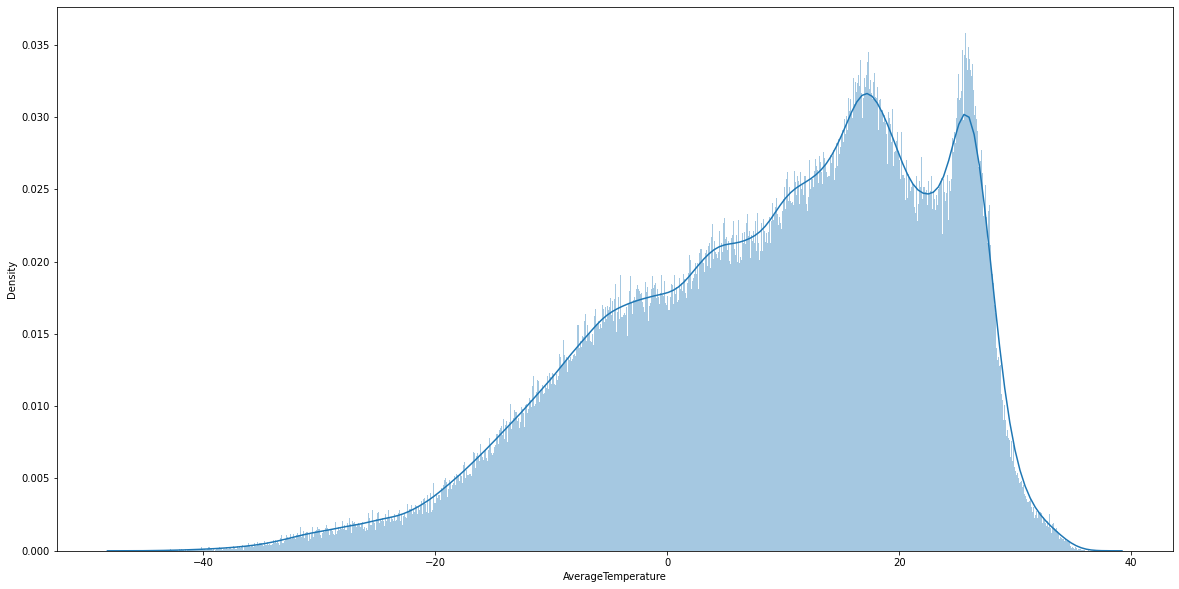

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df['AverageTemperature'], bins=2000)

***
# **Gráfico de Dispersão das temperaturas médias**
***

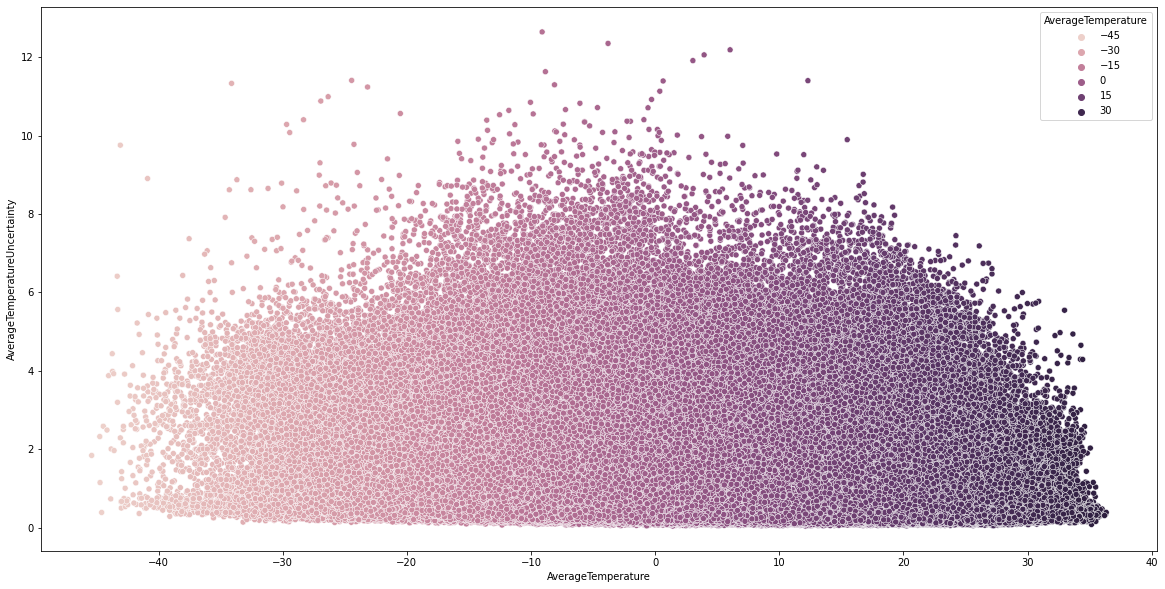

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x='AverageTemperature',
    y= 'AverageTemperatureUncertainty',
    data = df,
    hue="AverageTemperature"
)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)